# Machine Learing using H2O in R
This demo will focus on performing a Kmeans clustering analysis for a data set using the R interface to the H2O machine learning platform. H2O is a java based machine learning platform that provides an R interface. If you don't yet have H2O installed in your R you can install by doing the following:

In [ ]:
# The following two commands remove any previously installed H2O packages for R.
if ("package:h2o" %in% search()) { detach("package:h2o", unload=TRUE) }
if ("h2o" %in% rownames(installed.packages())) { remove.packages("h2o") }

# Next, we download packages that H2O depends on.
if (! ("methods" %in% rownames(installed.packages()))) { install.packages("methods") }
if (! ("statmod" %in% rownames(installed.packages()))) { install.packages("statmod") }
if (! ("stats" %in% rownames(installed.packages()))) { install.packages("stats") }
if (! ("graphics" %in% rownames(installed.packages()))) { install.packages("graphics") }
if (! ("RCurl" %in% rownames(installed.packages()))) { install.packages("RCurl") }
if (! ("jsonlite" %in% rownames(installed.packages()))) { install.packages("jsonlite") }
if (! ("tools" %in% rownames(installed.packages()))) { install.packages("tools") }
if (! ("utils" %in% rownames(installed.packages()))) { install.packages("utils") }

# Now we download, install and initialize the H2O package for R.
install.packages("h2o", type="source", repos=(c("http://h2o-release.s3.amazonaws.com/h2o/rel-ueno/2/R")))

You'll also need a fairly recent and working version of Java installed on your system. This shouldn't be an issue for most people. If you don't yet have R installed on your machine, you've come to the wrong notebook...

This tutorial uses data from http://archive.ics.uci.edu/ml/datasets/seeds. The data file `seeds_dataset.txt` contains 210 observations of 7 variables with an *a priori* grouping assignment.

We begin by importing the data into a initializing the H2O library and runtime environment. H2O runs as a seperate Java process and the cluster initialization has many options (use `?h2o.init` to explore these). 

In [1]:
library(h2o)
# Initialize and connect to h2o package, and nthreads=-1 means use all CPUs on the host. 
h2o.init(nthreads=1)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following objects are masked from 'package:stats':

    cor, sd, var

The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\zhou25\AppData\Local\Temp\RtmpMTuFi2/h2o_zhou25_started_from_r.out
    C:\Users\zhou25\AppData\Local\Temp\RtmpMTuFi2/h2o_zhou25_started_from_r.err


Starting H2O JVM and connecting: ...... Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         11 seconds 453 milliseconds 
    H2O cluster version:        3.10.4.2 
    H2O cluster version age:    29 days  
    H2O cluster name:           H2O_started_from_R_zhou25_ozf311 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.53 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  1 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 3.3.3 (2017-03-06) 



Next we'll get started with some data. Download the dataset <code>seeds_dataset.txt</code> and save it in the directory containing this notebook. To import data into H2O we use the <code>h2o.importFile()</code> function. The H2O data structures are seperate from R data structures, with some key differenences. However, we can export H2O structures as R data frames.

In [2]:
#Import data from text file
seeds.hex <- h2o.importFile('./seeds_dataset.txt')
#create R data frame
seedsDF <- as.data.frame(seeds.hex)
#inspect R data frame
head(seedsDF)
summary(seedsDF)

  |======================================================================| 100%


C1,C2,C3,C4,C5,C6,C7,C8
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


       C1              C2              C3               C4        
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :0.8189  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:0.8577   1st Qu.:5.2447  
 Median :14.36   Median :14.32   Median :0.8735   Median :5.5180  
 Mean   :14.85   Mean   :14.56   Mean   :0.8713   Mean   :5.5639  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:0.8877   3rd Qu.:5.9798  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.6750  
                                 NA's   :3                        
       C5              C6               C7              C8       
 Min.   :2.630   Min.   :0.7651   Min.   :3.485   Min.   :1.000  
 1st Qu.:2.956   1st Qu.:2.6002   1st Qu.:5.045   1st Qu.:1.000  
 Median :3.245   Median :3.5990   Median :5.226   Median :2.000  
 Mean   :3.281   Mean   :3.6935   Mean   :5.408   Mean   :2.084  
 3rd Qu.:3.566   3rd Qu.:4.7687   3rd Qu.:5.879   3rd Qu.:3.000  
 Max.   :5.325   Max.   :8.4560   Max.   :6.735   Max.   :5.439  
 N

Clean up the data and re-import.

In [3]:
#Import data from text file
seeds.hex <- h2o.importFile('./seeds_dataset_fixed.txt')
#create R data frame
seedsDF <- as.data.frame(seeds.hex)
#inspect R data frame
head(seedsDF)
summary(seedsDF)

  |======================================================================| 100%


C1,C2,C3,C4,C5,C6,C7,C8
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


       C1              C2              C3               C4       
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:0.8569   1st Qu.:5.262  
 Median :14.36   Median :14.32   Median :0.8734   Median :5.524  
 Mean   :14.85   Mean   :14.56   Mean   :0.8710   Mean   :5.629  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:0.8878   3rd Qu.:5.980  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675  
       C5              C6               C7              C8   
 Min.   :2.630   Min.   :0.7651   Min.   :4.519   Min.   :1  
 1st Qu.:2.944   1st Qu.:2.5615   1st Qu.:5.045   1st Qu.:1  
 Median :3.237   Median :3.5990   Median :5.223   Median :2  
 Mean   :3.259   Mean   :3.7002   Mean   :5.408   Mean   :2  
 3rd Qu.:3.562   3rd Qu.:4.7687   3rd Qu.:5.877   3rd Qu.:3  
 Max.   :4.033   Max.   :8.4560   Max.   :6.550   Max.   :3  

In [4]:
#Remove correct answers
seedsCOR <- as.factor(seedsDF$C8)
seedsDF$C8 <- NULL

We now have imported the data into an H2O data object and have access to it as an R data frame. It is important to remember that these are two seperate objects and altering one will not change the other. Next let's construct a Kmeans clustering model using the H2O function <code>h2o.kmeans</code>, and inspect the results.

In [5]:
seedsKM <- h2o.kmeans(training_frame = seeds.hex, k=3, init="PlusPlus", max_iterations = 100, 
                      x=c('C1','C2','C3','C4','C5','C6','C7'))
summary(seedsKM)
h2o.centers(seedsKM)

  |======================================================================| 100%
Model Details:

H2OClusteringModel: kmeans
Model Key:  KMeans_model_R_1492437075536_1 
Model Summary: 
  number_of_rows number_of_clusters number_of_categorical_columns
1            210                  3                             0
  number_of_iterations within_cluster_sum_of_squares total_sum_of_squares
1                   11                     428.60822           1463.00000
  between_cluster_sum_of_squares
1                     1034.39178

H2OClusteringMetrics: kmeans
** Reported on training data. **


Total Within SS:  428.6082
Between SS:  1034.392
Total SS:  1463 
Centroid Statistics: 
  centroid     size within_cluster_sum_of_squares
1        1 72.00000                     144.59544
2        2 67.00000                     139.55416
3        3 71.00000                     144.45861




Scoring History: 
             timestamp   duration iteration number_of_reassigned_observations
1  2017-04-17 09:5

c1,c2,c3,c4,c5,c6,c7
11.85694,13.24778,0.8482528,5.231750,2.849542,4.742389,5.101722
18.49537,16.20343,0.8842104,6.175687,3.697537,3.632373,6.041701
14.43789,14.33775,0.8815972,5.514577,3.259225,2.707341,5.120803


We now have a model based on the data. Let's see how well the clustering algorithm performed. First we can get the cluster predictions from the model and plot them against the principal components. 

The output above shows the process as how the <code>h2o.kmeans</code> works. After 9 iternations, the model clutered the data into 3 clusters successfully without anymore reassignment of the observations, and the within cluster sum of squares was the smallest.

The <code>h2o.centers</code> retrived the model centers after clustering.

In [46]:
install.packages("fpc", repos="http://cran.us.r-project.org")

Warning message:
"package 'fpc' is in use and will not be installed"

In [6]:
library(fpc)
library(cluster)
#Predict on an H2O model
seedsFIT <- h2o.predict(seedsKM, seeds.hex)
summary(seedsFIT)

  |======================================================================| 100%


Warning message in summary.H2OFrame(seedsFIT):
"Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter."

 predict         
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :1.0000  
 Mean   :0.9952  
 3rd Qu.:2.0000  
 Max.   :2.0000  

In [7]:
seedsFIT <- as.factor(as.numeric(seedsFIT$predict))

In [8]:
typeof(seedsFIT)

[1] "environment"

In [9]:
summary(seedsFIT)

Warning message in summary.H2OFrame(seedsFIT):
"Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter."

 predict
 0:72   
 2:71   
 1:67   

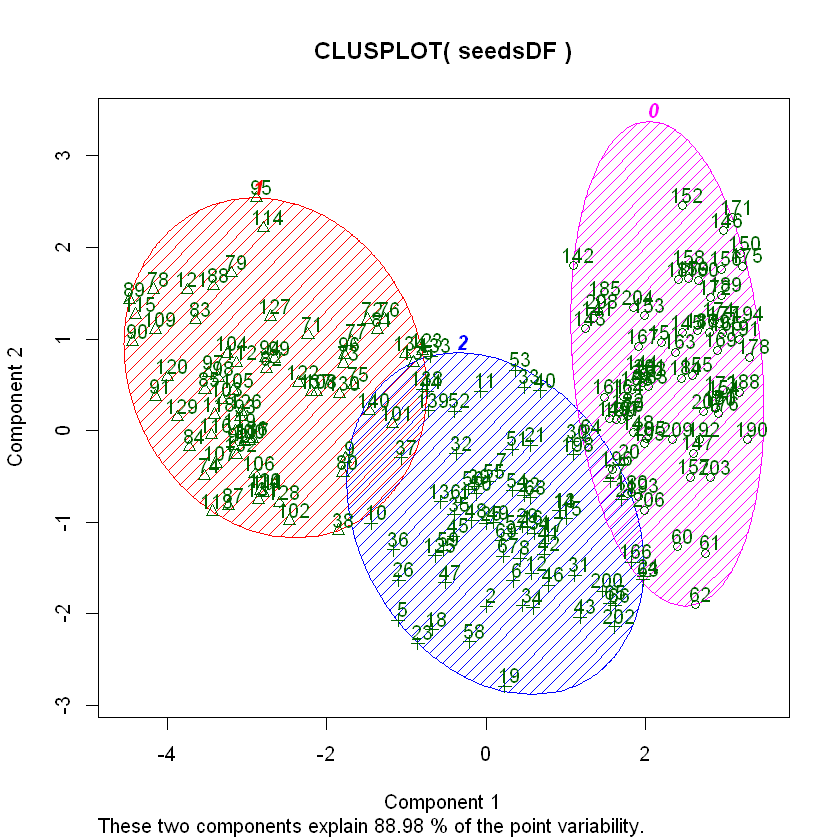

In [18]:
clusplot(seedsDF, seedsFIT, color=TRUE, shade=TRUE, labels=2, lines=0)

The <code>clusplot</code> function in the <code>cluster</code> package draws a 2-dimensional clustering plot with each cluster surrounded by an ellipse. All observations are indicated by points in the plot based on principal components or multidimensional scaling. 

Three clusters were created above. Each cluster were shaded and labeled. Points in each cluster were shown using different shapes. 

In [14]:
princomp <- prcomp(seedsDF, center = TRUE, scale. = TRUE)

Apply function <code>prcomp</code> to check up more details regarding the principal component analysis consisted in the <code>clusplot</code> function above.

In [15]:
print(princomp)

Standard deviations:
[1] 2.24303392 1.09433672 0.82340964 0.26146601 0.13679769 0.07302086 0.02850258

Rotation:
          PC1         PC2         PC3         PC4         PC5         PC6
C1 -0.4444735  0.02656355 -0.02587094  0.19363997 -0.20441167  0.42643686
C2 -0.4415715  0.08400282  0.05983912  0.29545659 -0.17427591  0.47623853
C3 -0.2770174 -0.52915125 -0.62969178 -0.33281640  0.33265481  0.14162884
C4 -0.4235633  0.20597518  0.21187966  0.26340659  0.76609839 -0.27357647
C5 -0.4328187 -0.11668963 -0.21648338  0.19963039 -0.46536555 -0.70301171
C6  0.1186925  0.71688203 -0.67950584  0.09246481  0.03625822  0.01964186
C7 -0.3871608  0.37719327  0.21389720 -0.80414995 -0.11134657 -0.04282974
            PC7
C1  0.734805689
C2 -0.670751532
C3 -0.072552703
C4  0.046276051
C5 -0.039289079
C6 -0.003723456
C7 -0.034498098


The <code>print</code> method returns the standard deviations of the 7 components, and their rotated loadings that are the coefficients of the linear combinations of the continuous variables in the data. 

In [16]:
summary(princomp)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2430 1.0943 0.82341 0.26147 0.13680 0.07302 0.02850
Proportion of Variance 0.7187 0.1711 0.09686 0.00977 0.00267 0.00076 0.00012
Cumulative Proportion  0.7187 0.8898 0.98668 0.99645 0.99912 0.99988 1.00000

The <code> summary </code> method shows the standard deviation of each of the 7 PCs in the first row. The second row indicates the propotion of the variance in the data explained by each of the sever PCs, which was sorted by descending. The thrid row contains the cummulative proportion of explained variance. We can find that the first two pCs explained 88.98%of the variance in the data, which is consistent with the result showed by <code>clusplot</code> function. 

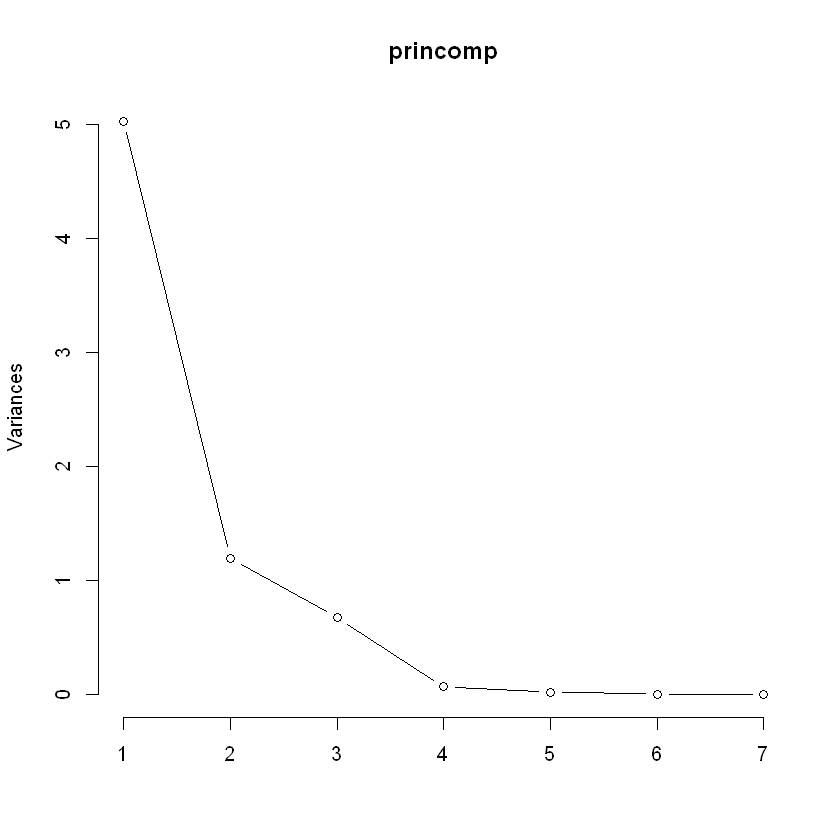

In [36]:
plot(princomp, type = "l")

The <code>plot</code> method returns a plot that describes the variances (y-axis) associated with PCs (x-axis). 

The figure above shows that the first two PCs explained most of the variability in the data. 

In [20]:
predict_frame <- as.data.frame(seedsFIT)

In [21]:
predict <- as.integer(predict_frame$predict)

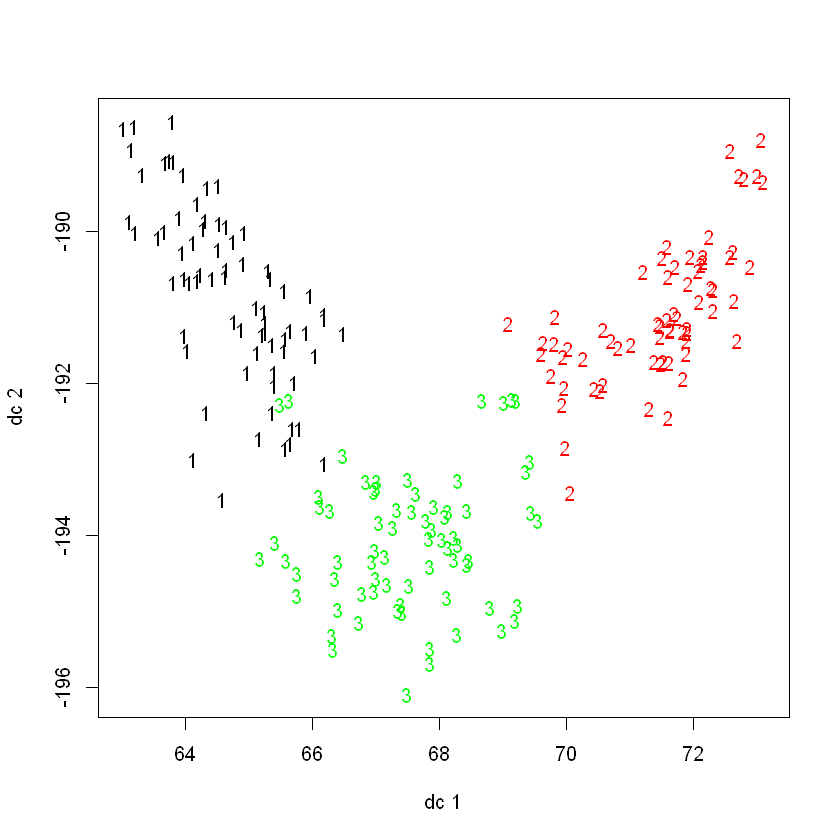

In [23]:
plotcluster(seedsDF, predict)

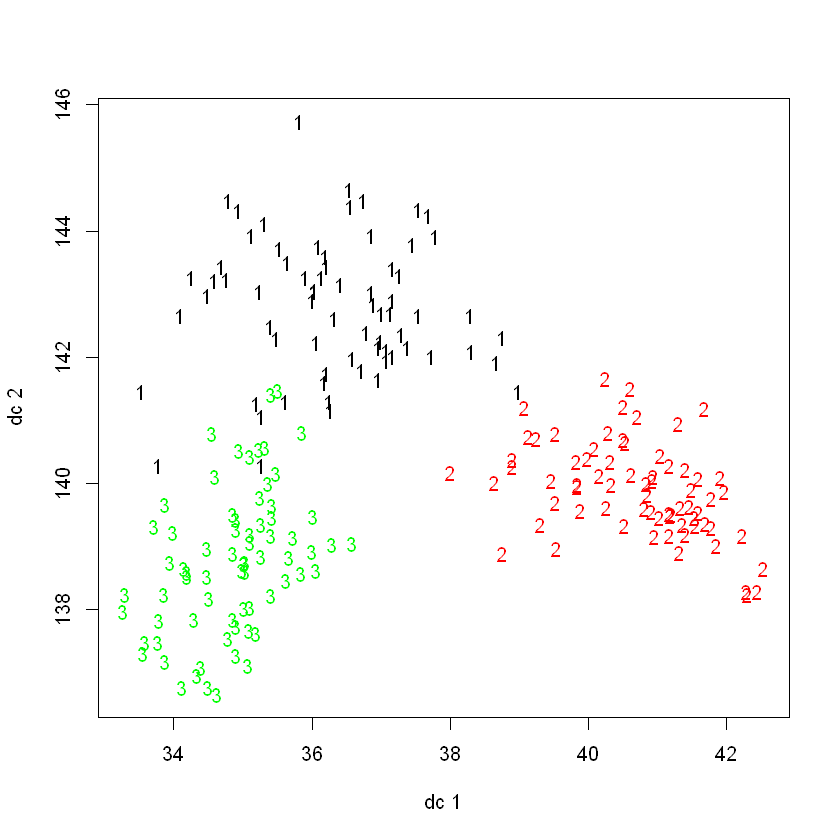

In [24]:
plotcluster(seedsDF, seedsCOR)

Finally, let's check for correctness.

In [25]:
h2o.table(seedsFIT$predict)

  predict Count
1       0    72
2       1    67
3       2    71

[3 rows x 2 columns] 

In [10]:
install.packages("plyr", repos="http://cran.us.r-project.org")

package 'plyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zhou25\AppData\Local\Temp\RtmpqulBww\downloaded_packages


In [26]:
predict <- as.factor(predict)
table(predict)

predict
 1  2  3 
72 67 71 

In [27]:
library(plyr)

In [28]:
table(predict)
table(seedsCOR)

predict
 1  2  3 
72 67 71 

seedsCOR
 1  2  3 
70 70 70 

In [29]:
str(predict)

 Factor w/ 3 levels "1","2","3": 3 3 3 3 3 3 3 3 2 3 ...


In [30]:
predict

[1] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 1 3 3 3 3 3 1 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 3 2 3 3 2 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 3 1 1 1 1 1 1 1 1
Levels: 1 2 3

In [31]:
seedsCOR

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
Levels: 1 2 3

In [32]:
predict2 <- revalue(predict, c("3"="1", "2"="2","1"="3"))

In [33]:
table(predict2, seedsCOR)

        seedsCOR
predict2  1  2  3
       3  6  0 66
       2  2 65  0
       1 62  5  4

In [26]:
h2o.shutdown()

Are you sure you want to shutdown the H2O instance running at http://localhost:54321/ (Y/N)? 


[1] TRUE